In [28]:
# Import libraries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in main dataset

df = pd.read_csv('application_train.csv')
df.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


Our dataset consists of 122 columns and 10 rows. For this project, we want to predict whether a future loan will be repaid on time based on historical data. In order to do this we will select the 10 variables that most strongly correlate with the 'TARGET' column. First we will take a look at the value counts in the 'TARGET' column. 0 correspond to a loan that was repaid on time, 1 corresponds to difficulties with repayment.

0    282686
1     24825
Name: TARGET, dtype: int64


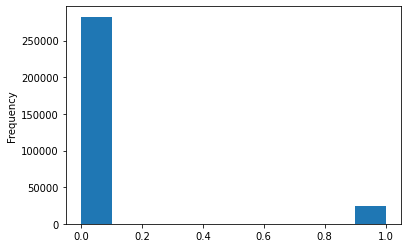

In [3]:
df['TARGET'].plot.hist()
print(df['TARGET'].value_counts())

We can see that most loans were repaid on time, with about 8% of borrowers having difficulty repaying.

The easiest way to select features that will produce an accurate model is by looking at the correlation coefficients between each variable and our 'TARGET' variable. These variables might change as we develop models. For now, we will select the 10 most strongly correlated variables based on correlation coefficient alone and plot them to observe the distribution.

In [4]:
correlations = df.corr()['TARGET'].sort_values()

print(correlations.tail(10))
print(correlations.head(10))

FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


Our 10 strongest correlations are: 

EXT_SOURCE_3, 
EXT_SOURCE_2, 
EXT_SOURCE_1, 
DAYS_BIRTH, 
REGION_RATING_CLIENT_W_CITY, 
REGION_RATING_CLIENT, 
DAYS_LAST_PHONE_CHANGE, 
DAYS_ID_PUBLISH, 
REG_CITY_NOT_WORK_CITY, 
FLAG_EMP_PHONE, 

In [27]:
variables = df[['EXT_SOURCE_3',
                'EXT_SOURCE_2',
                'EXT_SOURCE_1',
                'DAYS_BIRTH',
                'REGION_RATING_CLIENT_W_CITY', 
                'REGION_RATING_CLIENT', 
                'DAYS_LAST_PHONE_CHANGE', 
                'DAYS_ID_PUBLISH',
                'REG_CITY_NOT_WORK_CITY',
                'FLAG_EMP_PHONE']]

variables.shape

(307511, 10)

The 3 strongest correlations are normalized scores provided by an external data source. There is not much information provided about these variables other than that. Despite this, these variables can be useful in a predictive model. Based on the correlation table above as well as the heatmap below we can see that all 3 external data variables have a negative correlation.

<AxesSubplot:title={'center':'EXT data correlation heatmap'}>

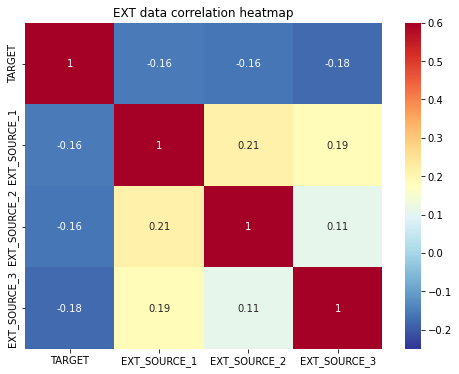

In [5]:
ext_data = df[['TARGET',
               'EXT_SOURCE_1',
               'EXT_SOURCE_2',
               'EXT_SOURCE_3']]

plt.figure(figsize=(8, 6))
plt.title('EXT data correlation heatmap')

sns.heatmap(ext_data.corr(),
            cmap = plt.cm.RdYlBu_r,
            vmin = -0.25,
            annot = True,
            vmax = 0.6)

The next strongest correlation is DAYS_BIRTH, which is the age of the client at the time of the loan. A simple histogram of this variable# add an 'AGE' column to our dataframe to make it easier to create a graph.

df['AGE'] = abs(df['DAYS_BIRTH']/365) shows a roughly Gaussian distribution with no outliers.

In [6]:
# add an 'AGE' column to our dataframe to make it easier to create a graph.

df['AGE'] = df['DAYS_BIRTH']/365

Text(0, 0.5, 'count')

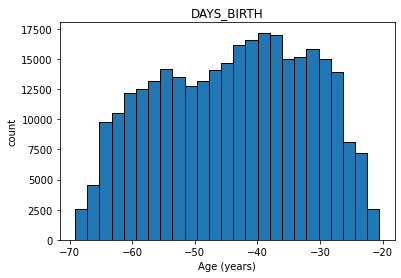

In [7]:
plt.hist(df['AGE'],
         edgecolor = 'k',
         bins = 25)
plt.title('DAYS_BIRTH')
plt.xlabel('Age (years)')
plt.ylabel('count')

For some reason the 'DAYS_BIRTH' variable appears to be negative, so we need to fix that using the abs() function. 

Text(0, 0.5, 'count')

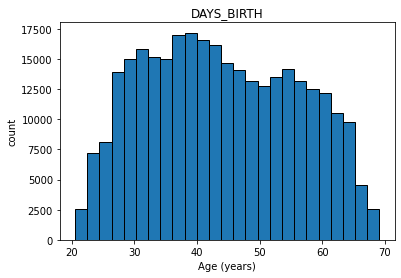

In [8]:
plt.hist(abs(df['AGE']),
         edgecolor = 'k',
         bins = 25)
plt.title('DAYS_BIRTH')
plt.xlabel('Age (years)')
plt.ylabel('count')

This is great for checking for outliers but gives little to no information regarding loan repayment. Binning can be used to separate clients into age 'bins' which can then be used to visualize loan repayment based on age group.

In order to do this we calculate the clients age as well as the bin that they will fall under:

In [29]:
pd.options.mode.chained_assignment = None

age_data = abs(df[['TARGET', 'DAYS_BIRTH']])
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH']/365

age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

print(age_data.shape)
age_data.head(10)

(307511, 4)


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


Then, we group each client based on 'YEARS_BINNED' and calculate the average 'TARGET' and plot:

In [18]:
group = age_data.groupby('YEARS_BINNED').mean()
group

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0, 0.5, '% failure to repay')

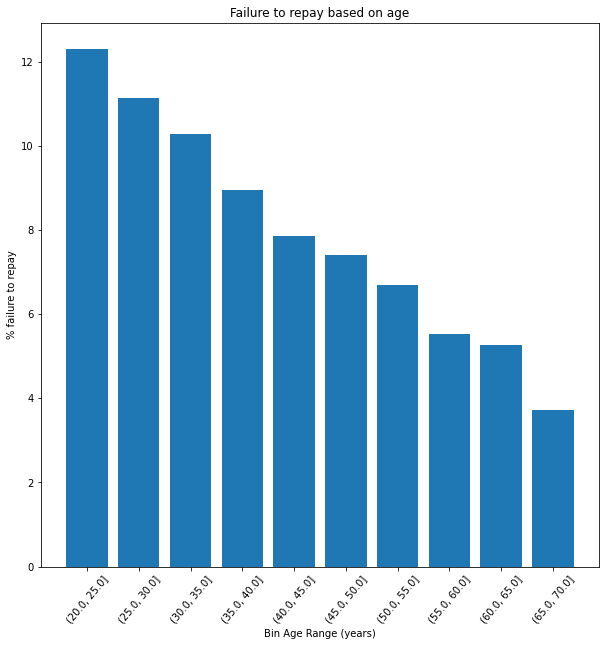

In [24]:
plt.figure(figsize=(10,10))

plt.bar(group.index.astype(str), 100 * group['TARGET'])
plt.title('Failure to repay based on age')
plt.xticks(rotation = 50)
plt.xlabel('Bin Age Range (years)')
plt.ylabel('% failure to repay')

From this plot we can see that younger borrowers are less likely to repay than older clients.

For the remaining 6 variables we will simply look at the histograms to ensure that there are no outliers and visualize the distribution. For encoded variables we want to check that all of our values fall under one of the classes (i.e. 0, 1, 2, or 3)

Text(0.5, 1.0, 'FLAG_EMP_PHONE')

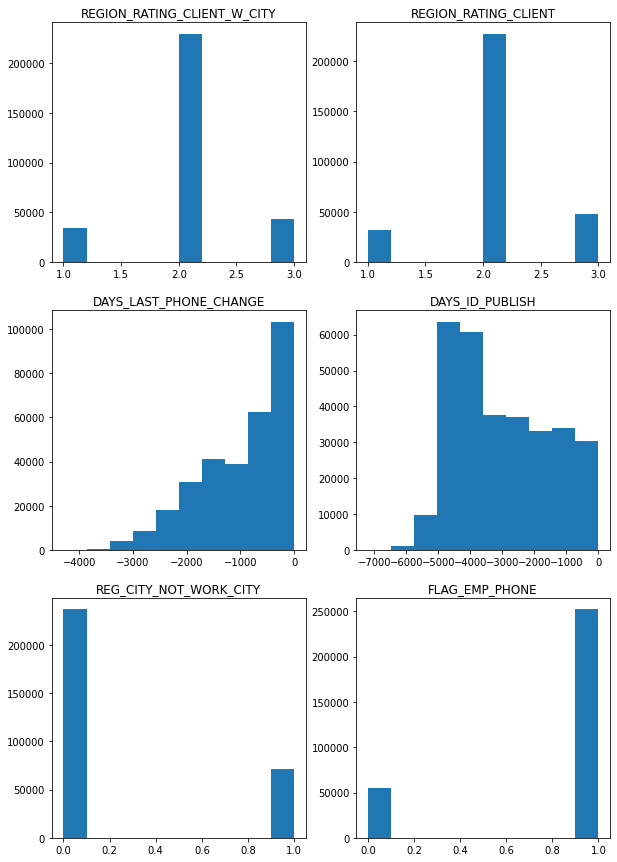

In [43]:
plt.figure(figsize=(10,15))

plt.subplot(3,2,1)
plt.hist(df['REGION_RATING_CLIENT_W_CITY'])
plt.title('REGION_RATING_CLIENT_W_CITY')

plt.subplot(3,2,2)
plt.hist(df['REGION_RATING_CLIENT'])
plt.title('REGION_RATING_CLIENT')

plt.subplot(3,2,3)
plt.hist(df['DAYS_LAST_PHONE_CHANGE'])
plt.title('DAYS_LAST_PHONE_CHANGE')

plt.subplot(3,2,4)
plt.hist(df['DAYS_ID_PUBLISH'])
plt.title('DAYS_ID_PUBLISH')

plt.subplot(3,2,5)
plt.hist(df['REG_CITY_NOT_WORK_CITY'])
plt.title('REG_CITY_NOT_WORK_CITY')

plt.subplot(3,2,6)
plt.hist(df['FLAG_EMP_PHONE'])
plt.title('FLAG_EMP_PHONE')